# ML4N - Group Project 7
## Analysing Adversarial Attacks on Tabular Data Classifiers

<a id="Introduction"></a> <br>


# **Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

<h2>Content</h2>
The selected attributes are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

## 1 Data exploration and preprocessing

<a id="Librarys"></a> <br>
# **Librarys:** 
- Importing Librarys
- Importing Dataset

### 1.1 Dataset Acquisition 

In [1]:
#Load the librarys
import plotly.express as px # To work with plot
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from sklearn.preprocessing import StandardScaler
# import needed python libraries
# Per ora ci ho messo quanta più roba potesse servire, in seguito rimuoviamo ciò che non serve 

%matplotlib inline

import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import StrMethodFormatter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#List of Attributes for dataset acquired from german.doc
#good/bad is the label 1 means good customer while 2 means bad
attributes = ["Status_account", "Duration", "Credit_history","Purpose",
             "Credit_amount","Savings_account/bonds","Employment_since","Install_rate",
              "Personal_status_sex","debtors_guarantors","Present_residence_since",
              "Property","Age","Other_install_plans","Housing","No_credits","Job",
              "No_people_liable","Telephone","foreign_worker","good_bad"] 

#Acquiring dataset from german.data file
df_credit = pd.read_csv("german.data", sep=' ', names = attributes)

### 1.3 Exploratory Data Analysis 

<a id="Known"></a> <br>
# **First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [2]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status_account           1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit_history           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_amount            1000 non-null   int64 
 5   Savings_account/bonds    1000 non-null   object
 6   Employment_since         1000 non-null   object
 7   Install_rate             1000 non-null   int64 
 8   Personal_status_sex      1000 non-null   object
 9   debtors_guarantors       1000 non-null   object
 10  Present_residence_since  1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_install_plans      1000 non-null   object
 14  Housing                  1000 non-null   

In [3]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Status_account               4
Duration                    33
Credit_history               5
Purpose                     10
Credit_amount              921
Savings_account/bonds        5
Employment_since             5
Install_rate                 4
Personal_status_sex          4
debtors_guarantors           3
Present_residence_since      4
Property                     4
Age                         53
Other_install_plans          3
Housing                      3
No_credits                   4
Job                          4
No_people_liable             2
Telephone                    2
foreign_worker               2
good_bad                     2
dtype: int64
  Status_account  Duration Credit_history Purpose  Credit_amount  \
0            A11         6            A34     A43           1169   
1            A12        48            A32     A43           5951   
2            A14        12            A34     A46           2096   
3            A11        42            A32     A42           7882

# **4. Some explorations:** <a id="Explorations"></a> <br>

- Starting by distribuition of column Age.
- Some Seaborn graphical
- Columns crossing



<h2>Let's start looking through target variable and their distribuition</h2>

In [4]:
# it's a library that we work with plotly
import plotly.offline as py 
import plotly.express as px
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

df_credit['good_bad'] = df_credit['good_bad'].replace([1],'Good')
df_credit['good_bad'] = df_credit['good_bad'].replace([2],'Bad')
trace0 = go.Bar(
            x = df_credit[df_credit["good_bad"]== 'Good']["good_bad"].value_counts().index.values,
            y = df_credit[df_credit["good_bad"]== 'Good']["good_bad"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["good_bad"]== 'Bad']["good_bad"].value_counts().index.values,
            y = df_credit[df_credit["good_bad"]== 'Bad']["good_bad"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

### Age

Age is a numeric column. The minimum age in the dataset is 19 and the maximum age is 75. Thus, we can visualize the distribution of age using a histogram with 56 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [5]:
df_credit.Age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [6]:
fig = px.histogram(df_credit, 
                   x='Age', 
                   marginal='box', 
                   nbins=56, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
df_good = df_credit.loc[df_credit["good_bad"] == 'Good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["good_bad"] == 'Bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/home/mrnbd/.local/lib/python3.10/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [8]:
fig = px.histogram(df_credit, 
                   x='Age', 
                   marginal='box', 
                   color='good_bad', 
                   color_discrete_sequence=['blue', 'red'], 
                   title='Age Distribution for Good or Bad creditors')
fig.update_layout(bargap=0.1)
fig.show()

/tmp/ipykernel_1189229/858309010.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_1189229/858309010.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




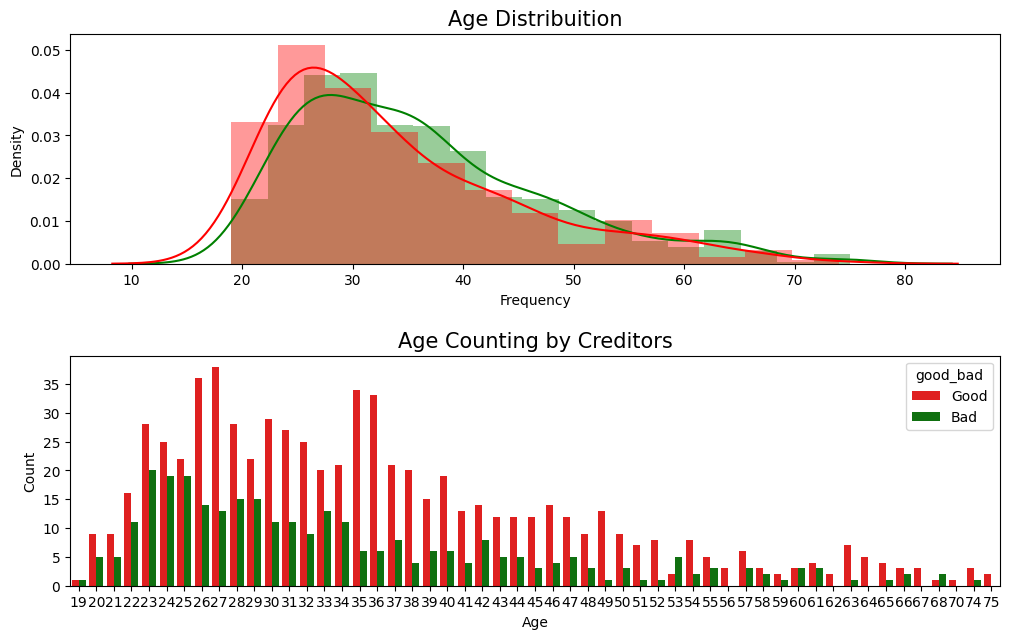

In [9]:
df_good = df_credit[df_credit["good_bad"] == 'Good']
df_bad = df_credit[df_credit["good_bad"] == 'Bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit,
              palette=['r',"g"],  
              hue = "good_bad")
g2.set_title("Age Counting by Creditors", fontsize=15)
g2.set_xlabel("Age")
g2.set_ylabel("Count")
plt.show()

### UNIVARIATE ANALYSIS

/tmp/ipykernel_1189229/3489351043.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_1189229/3489351043.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_1189229/3489351043.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

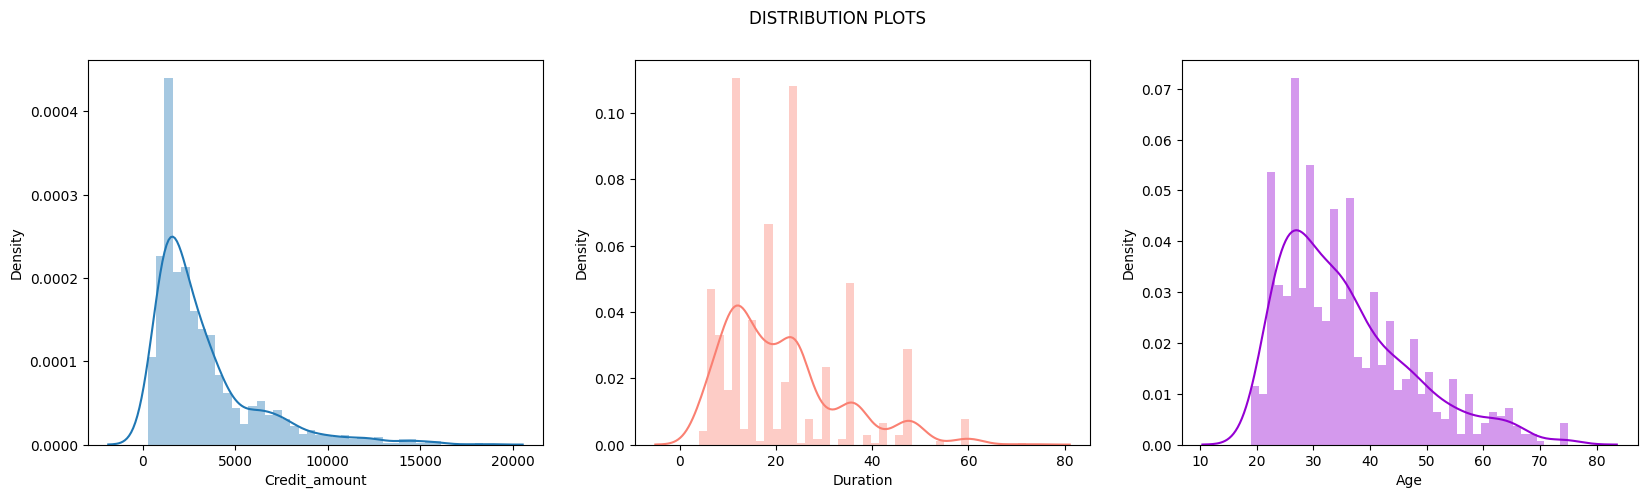

In [10]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df_credit['Credit_amount'], bins=40, ax=ax[0]);
sns.distplot(df_credit['Duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(df_credit['Age'], bins=40, ax=ax[2], color='darkviolet');

### INSIGHTS
---
* Most of the credit cards have an amount of 1500 - 4000
* The Credit amount is positively skewed, So the samples are dispersed

In [11]:
#Show basic stats
df_credit[['Age', 'Duration', 'Credit_amount']].describe()

Age     Duration  Credit_amount
count  1000.000000  1000.000000    1000.000000
mean     35.546000    20.903000    3271.258000
std      11.375469    12.058814    2822.736876
min      19.000000     4.000000     250.000000
25%      27.000000    12.000000    1365.500000
50%      33.000000    18.000000    2319.500000
75%      42.000000    24.000000    3972.250000
max      75.000000    72.000000   18424.000000

### BIVARIATE ANALYSIS

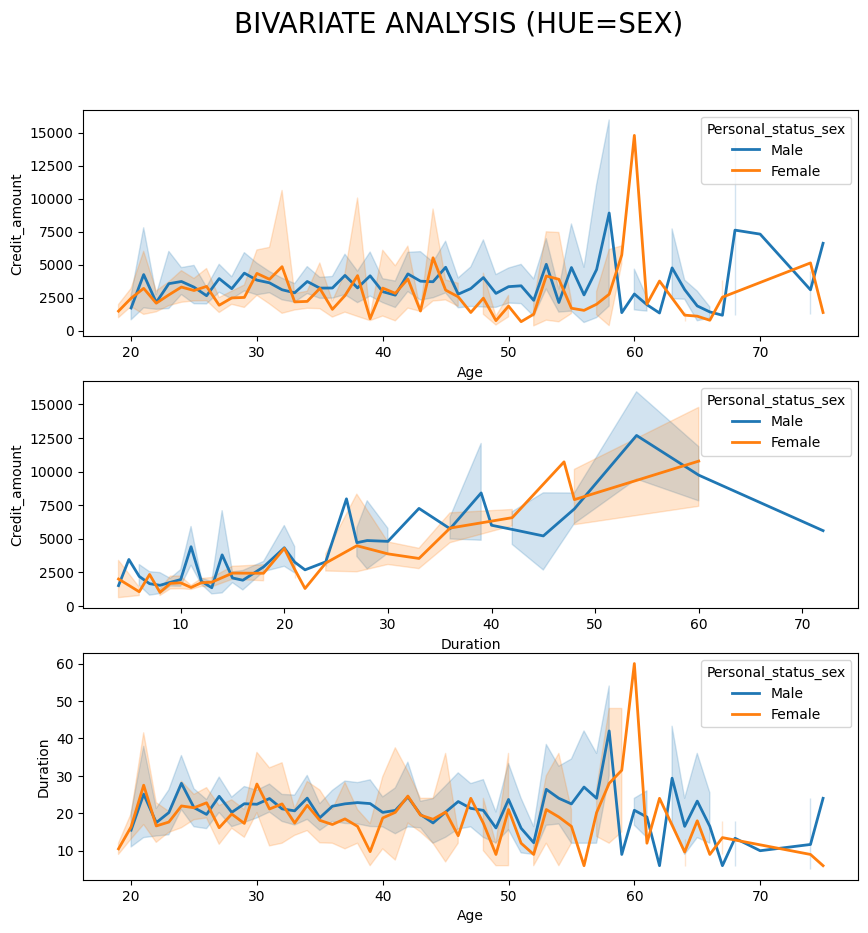

In [12]:
df_credit['Personal_status_sex'] = df_credit['Personal_status_sex'].replace(['A91'],'Male')
df_credit['Personal_status_sex'] = df_credit['Personal_status_sex'].replace(['A94'],'Male')
df_credit['Personal_status_sex'] = df_credit['Personal_status_sex'].replace(['A93'],'Male')
df_credit['Personal_status_sex'] = df_credit['Personal_status_sex'].replace(['A92'],'Female')
df_credit['Personal_status_sex'] = df_credit['Personal_status_sex'].replace(['A95'],'Female')
fig, ax = plt.subplots(3,1,figsize=(10,10))
plt.suptitle('BIVARIATE ANALYSIS (HUE=SEX)', fontsize=20)


sns.lineplot(data=df_credit, x='Age', y='Credit_amount', hue='Personal_status_sex', lw=2, ax=ax[0]);
sns.lineplot(data=df_credit, x='Duration', y='Credit_amount', hue='Personal_status_sex', lw=2, ax=ax[1]);
sns.lineplot(data=df_credit, x='Age', y='Duration', hue='Personal_status_sex', lw=2, ax=ax[2]);


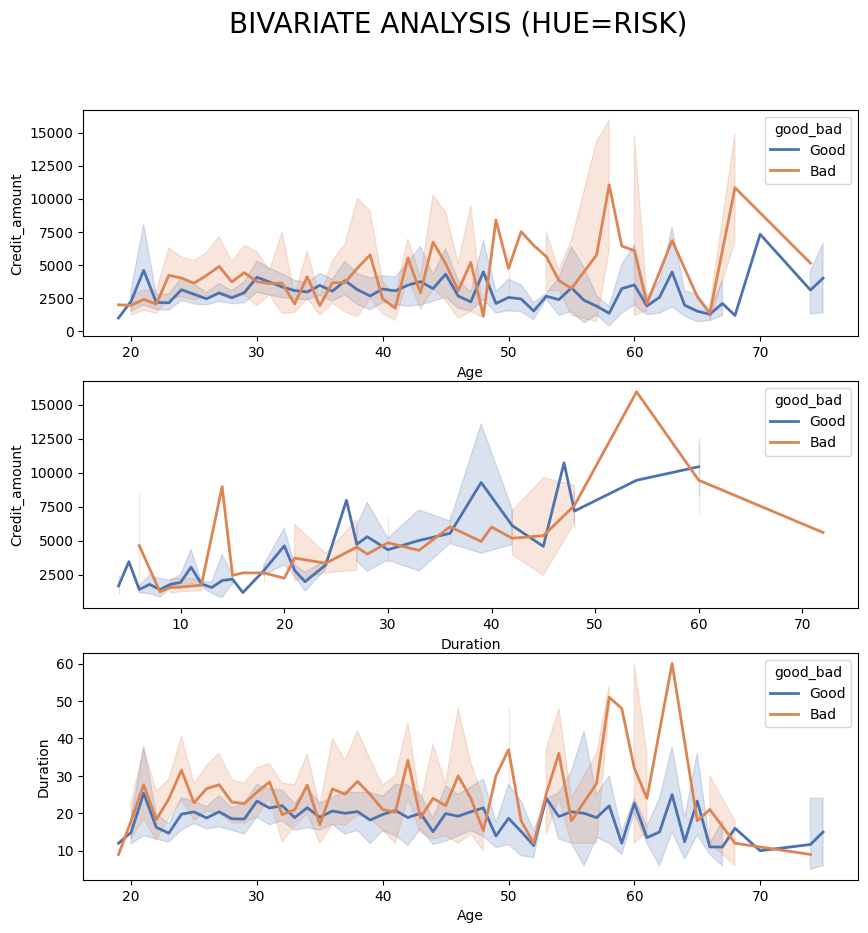

In [13]:
ig, ax = plt.subplots(3,1,figsize=(10,10))
plt.suptitle('BIVARIATE ANALYSIS (HUE=RISK)', fontsize=20)

sns.lineplot(data=df_credit, x='Age', y='Credit_amount', hue='good_bad', lw=2, ax=ax[0], palette='deep');
sns.lineplot(data=df_credit, x='Duration', y='Credit_amount', hue='good_bad', lw=2, ax=ax[1], palette='deep');
sns.lineplot(data=df_credit, x='Age', y='Duration', hue='good_bad', lw=2, ax=ax[2], palette='deep');

### INSIGHTS
---
* There is a linear relationship between Duration and Creadit Amount, Which makes sense because usually, people take bigger credits for longer periods. 
* The trend Between Age and Credit amount is not clear.

### PAIRPLOT TO VISUALIZE FEATURES WITH LINEAR RELATIONSHIP

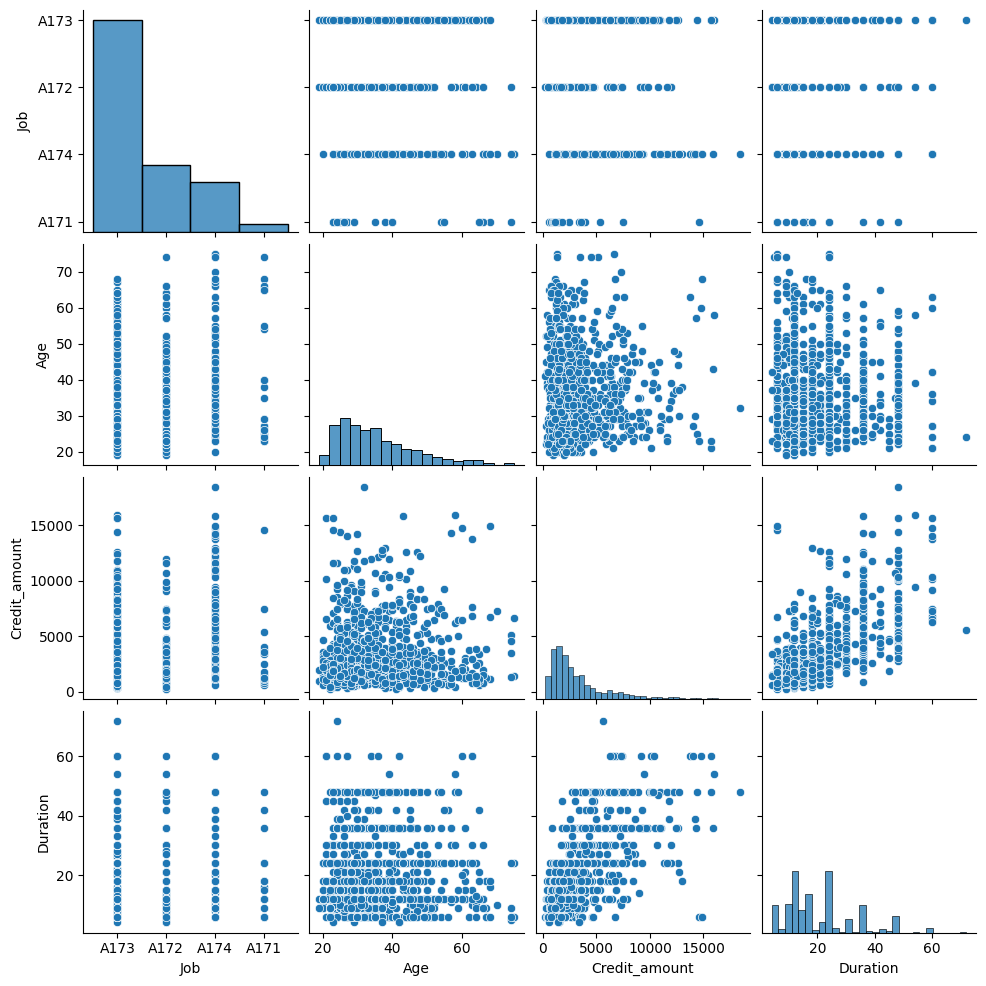

In [14]:
sns.pairplot(df_credit, vars=['Job','Age','Credit_amount','Duration']);

In [15]:
fig = px.scatter(df_credit, 
                 x='Credit_amount', 
                 y='Duration', 
                 color='good_bad', 
                 opacity=0.8, 
                 hover_data=['Personal_status_sex','Age'], 
                 title='Duration vs. Credit amount')
fig.update_traces(marker_size=5)
fig.show()

<h2>Creating an categorical variable to handle with the Age variable </h2>

In [16]:
#Let's look the Credit Amount column
interval = (19, 25, 35, 50, 70)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["good_bad"] == 'Good']
df_bad = df_credit[df_credit["good_bad"] == 'Bad']

In [17]:
trace0 = go.Box(
    y=df_good["Credit_amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit_amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (Express in US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

<h2>I will now Look the distribuition of Housing own and rent by Risk</h2>


In [18]:
df_credit['Housing'] = df_credit['Housing'].replace(['A151'],'rent')
df_credit['Housing'] = df_credit['Housing'].replace(['A152'],'own')
df_credit['Housing'] = df_credit['Housing'].replace(['A153'],'free')
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

<h3>Distribuition of Credit Amount by Housing</h3>

In [19]:
trace0 = go.Box(
    y=df_credit["Credit_amount"],
    x=df_credit["Housing"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_credit['Credit_amount'],
    x=df_credit['Housing'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (Express in US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Distribuition of Credit Amount by Housing'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

<h2>Looking the diference by Sex</h2>

In [20]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Good']["Personal_status_sex"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Good']["Personal_status_sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Bad']["Personal_status_sex"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Bad']["Personal_status_sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["good_bad"]== 'Good']["Personal_status_sex"],
    y = df_credit[df_credit["good_bad"]== 'Good']["Credit_amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["good_bad"]== 'Bad']["Personal_status_sex"],
    y = df_credit[df_credit["good_bad"]== 'Bad']["Credit_amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

/home/mrnbd/.local/lib/python3.10/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [21]:
df_credit['Job'] = df_credit['Job'].replace(['A171'],'Unemployed')
df_credit['Job'] = df_credit['Job'].replace(['A172'],'Unskilled')
df_credit['Job'] = df_credit['Job'].replace(['A173'],'Skilled employee')
df_credit['Job'] = df_credit['Job'].replace(['A174'],'Highly qualified employee')
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [22]:
trace0 = go.Box(
    x = df_credit[df_credit["good_bad"]== 'Good']["Job"],
    y = df_credit[df_credit["good_bad"]== 'Good']["Credit_amount"],
    name='Good credit'
)

trace1 = go.Box(
    x = df_credit[df_credit["good_bad"]== 'Bad']["Job"],
    y = df_credit[df_credit["good_bad"]== 'Bad']["Credit_amount"],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

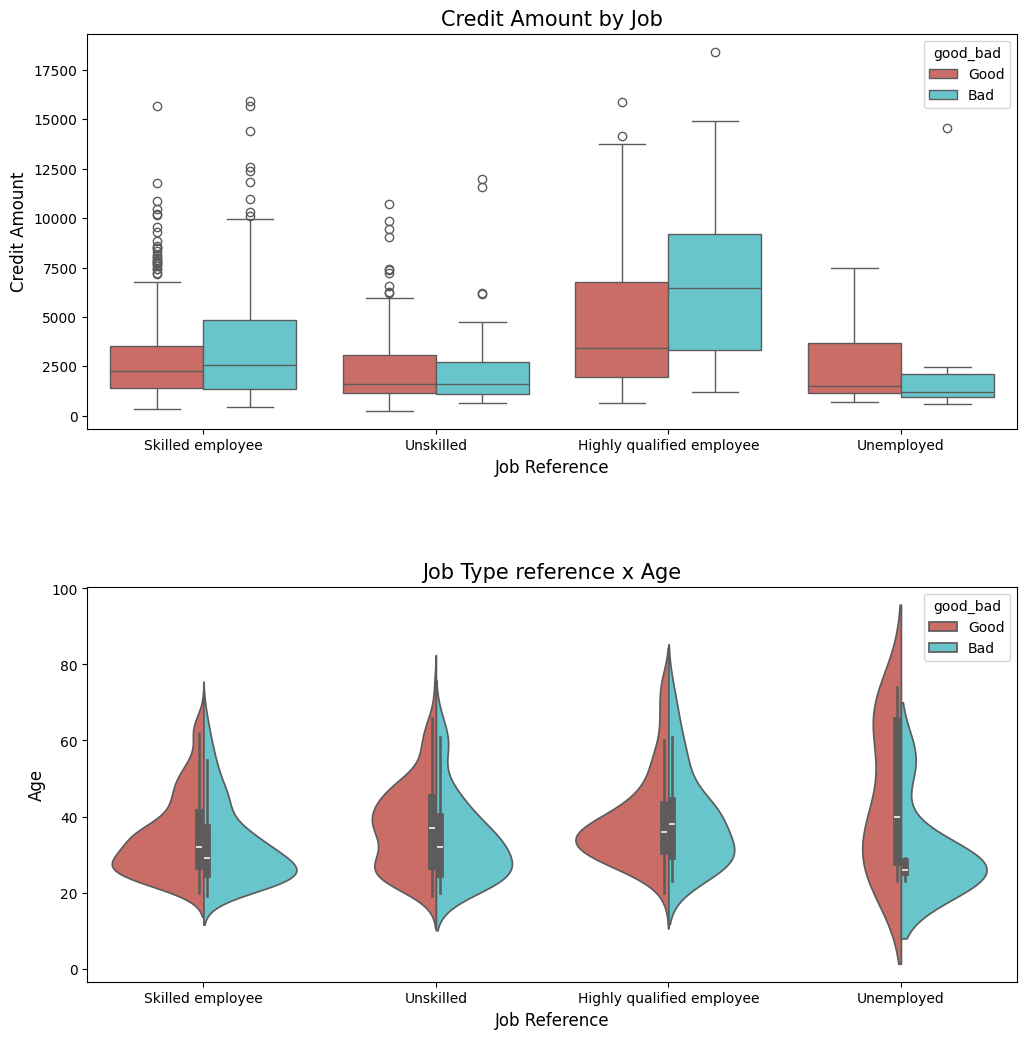

In [23]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit_amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="good_bad")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="good_bad", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


In [24]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_credit[df_credit["good_bad"]== 'Good']["Credit_amount"]) 
x2 = np.log(df_credit[df_credit["good_bad"]== 'Bad']["Credit_amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

/tmp/ipykernel_1189229/572056886.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




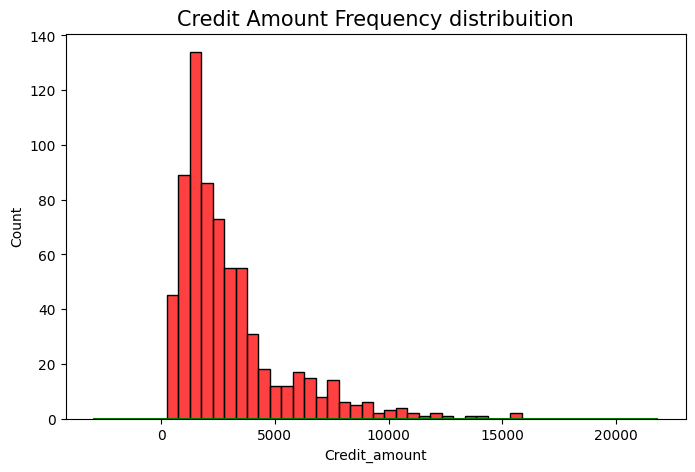

In [25]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.histplot(df_credit[df_credit["good_bad"]== 'Good']["Credit_amount"], color='r')
g = sns.distplot(df_credit[df_credit["good_bad"]== 'Bad']["Credit_amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

In [26]:
from plotly.subplots import  make_subplots
import numpy as np
import plotly.graph_objs as go

#Attibute 6:  (qualitative)
#	      Savings account/bonds
#	      A61 :          ... <  100 DM Bad
#	      A62 :   100 <= ... <  500 DM Middle
#	      A63 :   500 <= ... < 1000 DM Good
#	      A64 :          .. >= 1000 DM Excellent
#              A65 :   unknown/ no savings account
df_credit['Savings_account/bonds'] = df_credit['Savings_account/bonds'].replace(['A61'],'Bad')
df_credit['Savings_account/bonds'] = df_credit['Savings_account/bonds'].replace(['A62'],'Middle')
df_credit['Savings_account/bonds'] = df_credit['Savings_account/bonds'].replace(['A63'],'Good')
df_credit['Savings_account/bonds'] = df_credit['Savings_account/bonds'].replace(['A64'],'Excellent')
df_credit['Savings_account/bonds'] = df_credit['Savings_account/bonds'].replace(['A65'],'No saving account')

count_good = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Good']["Savings_account/bonds"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Good']["Savings_account/bonds"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Bad']["Savings_account/bonds"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Bad']["Savings_account/bonds"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_credit[df_credit["good_bad"]== 'Good']["Savings_account/bonds"],
    y=df_credit[df_credit["good_bad"]== 'Good']["Credit_amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_credit[df_credit["good_bad"]== 'Bad']["Savings_account/bonds"],
    y=df_credit[df_credit["good_bad"]== 'Bad']["Credit_amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_credit[df_credit["good_bad"]== 'Good']["Savings_account/bonds"],
    y=df_credit[df_credit["good_bad"]== 'Good']["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_credit[df_credit["good_bad"]== 'Bad']["Savings_account/bonds"],
    y=df_credit[df_credit["good_bad"]== 'Bad']["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')


Description of Distribuition Saving accounts by Risk:  
good_bad               Bad  Good
Savings_account/bonds           
Bad                    217   386
Excellent                6    42
Good                    11    52
Middle                  34    69
No saving account       32   151


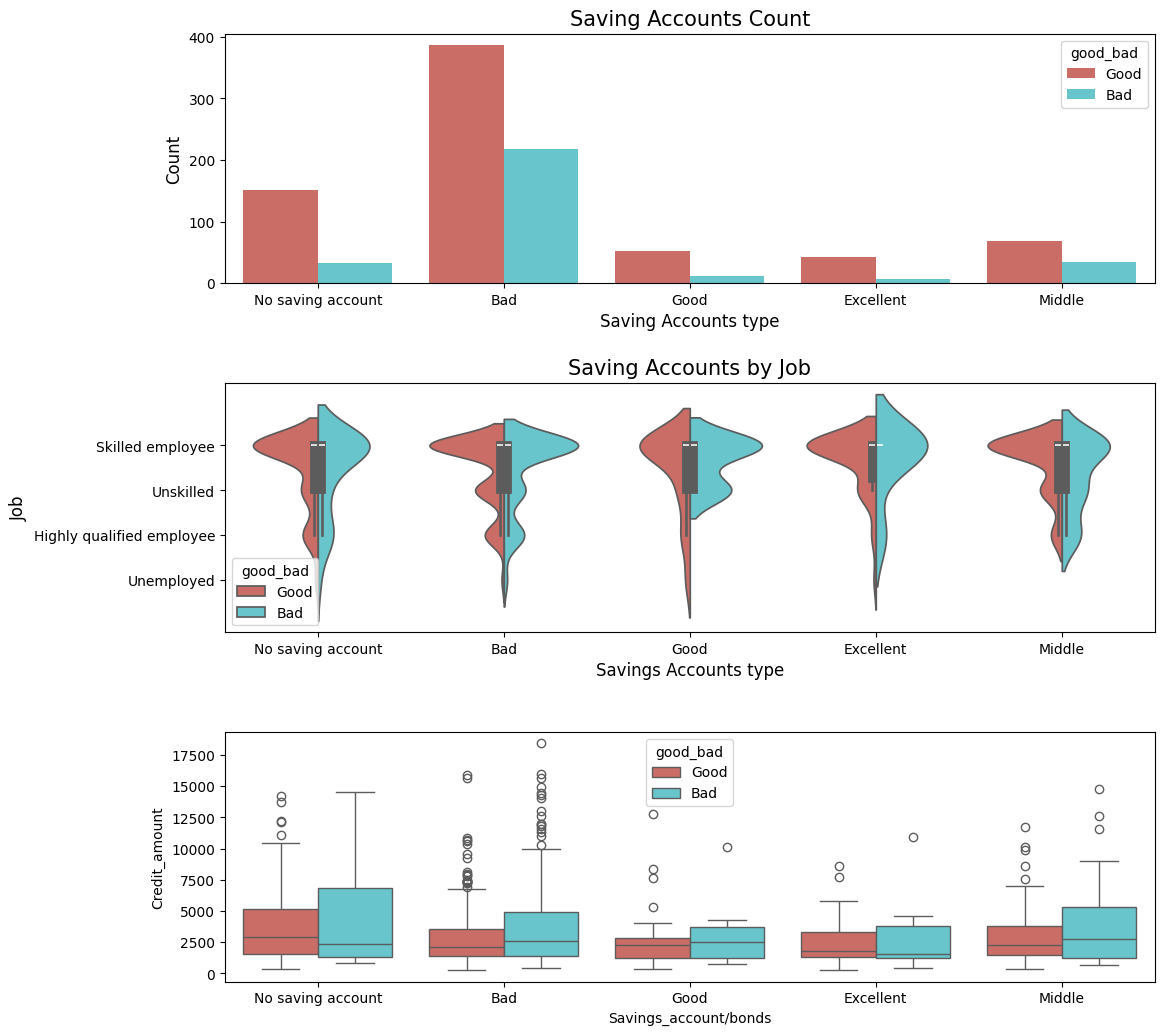

In [27]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Savings_account/bonds"],df_credit.good_bad))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Savings_account/bonds", data=df_credit, palette="hls", 
              ax=ax[0],hue="good_bad")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Savings_account/bonds", y="Job", data=df_credit, palette="hls", 
               hue = "good_bad", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Savings_account/bonds", y="Credit_amount", data=df_credit, ax=ax[2],
            hue = "good_bad",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Values describe: 
good_bad             Bad  Good
Purpose                       
Business              34    63
Domestic appliances    4     8
Education             22    28
Furniture/equipment   58   123
New Car               89   145
Others                 5     7
Radio/television      62   218
Repairs                8    14
Retraining             1     8
Used Car              17    86


/tmp/ipykernel_1189229/4225385428.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_1189229/4225385428.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



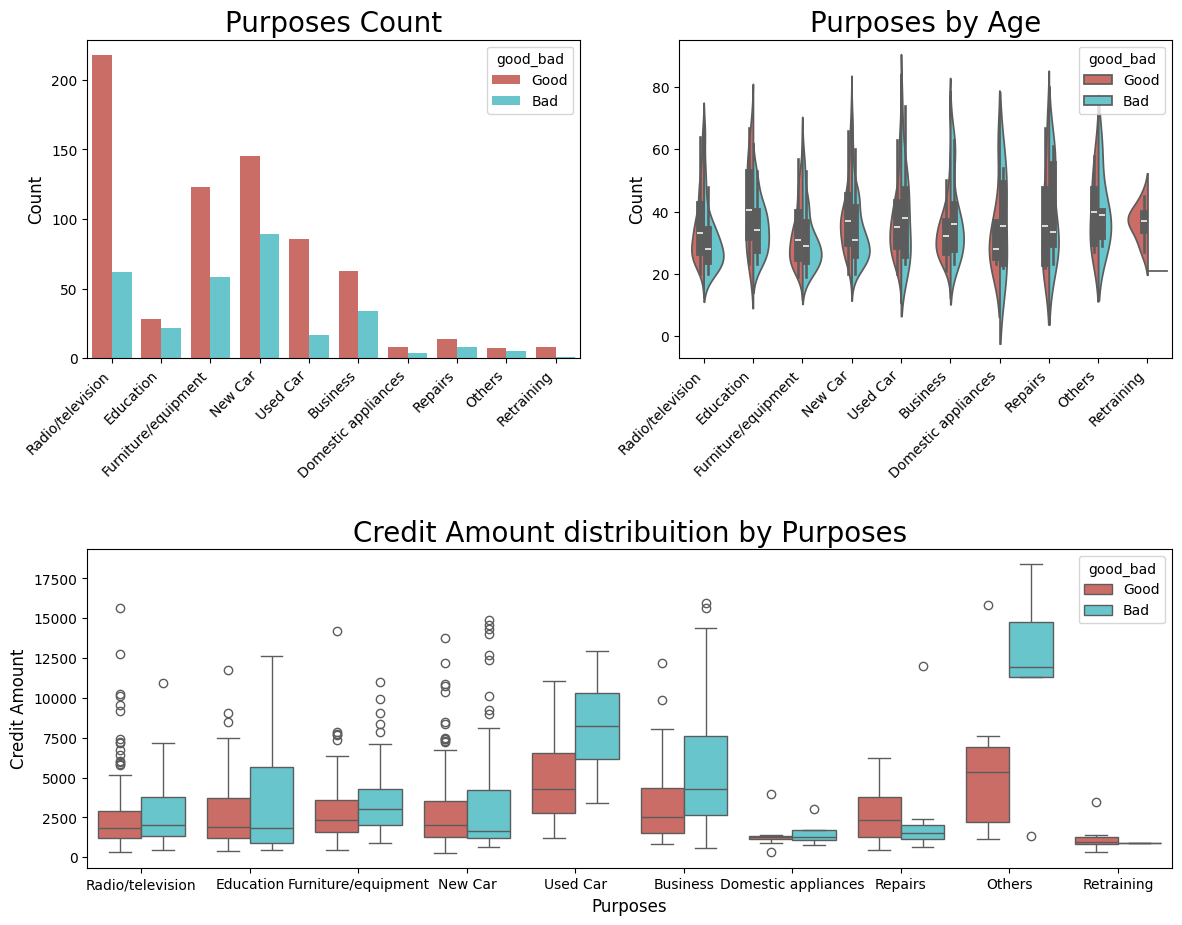

In [28]:
df_credit['Purpose'] = df_credit['Purpose'].replace(['A40'],'New Car')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A41'],'Used Car')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A42'],'Furniture/equipment')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A43'],'Radio/television')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A44'],'Domestic appliances')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A45'],'Repairs')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A46'],'Education')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A47'],'Vacation')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A48'],'Retraining')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A49'],'Business')
df_credit['Purpose'] = df_credit['Purpose'].replace(['A410'],'Others')
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.good_bad))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "good_bad")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "good_bad",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45, ha="right")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit_amount", data=df_credit, 
               palette="hls", hue = "good_bad")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

/tmp/ipykernel_1189229/305741598.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_1189229/305741598.py:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




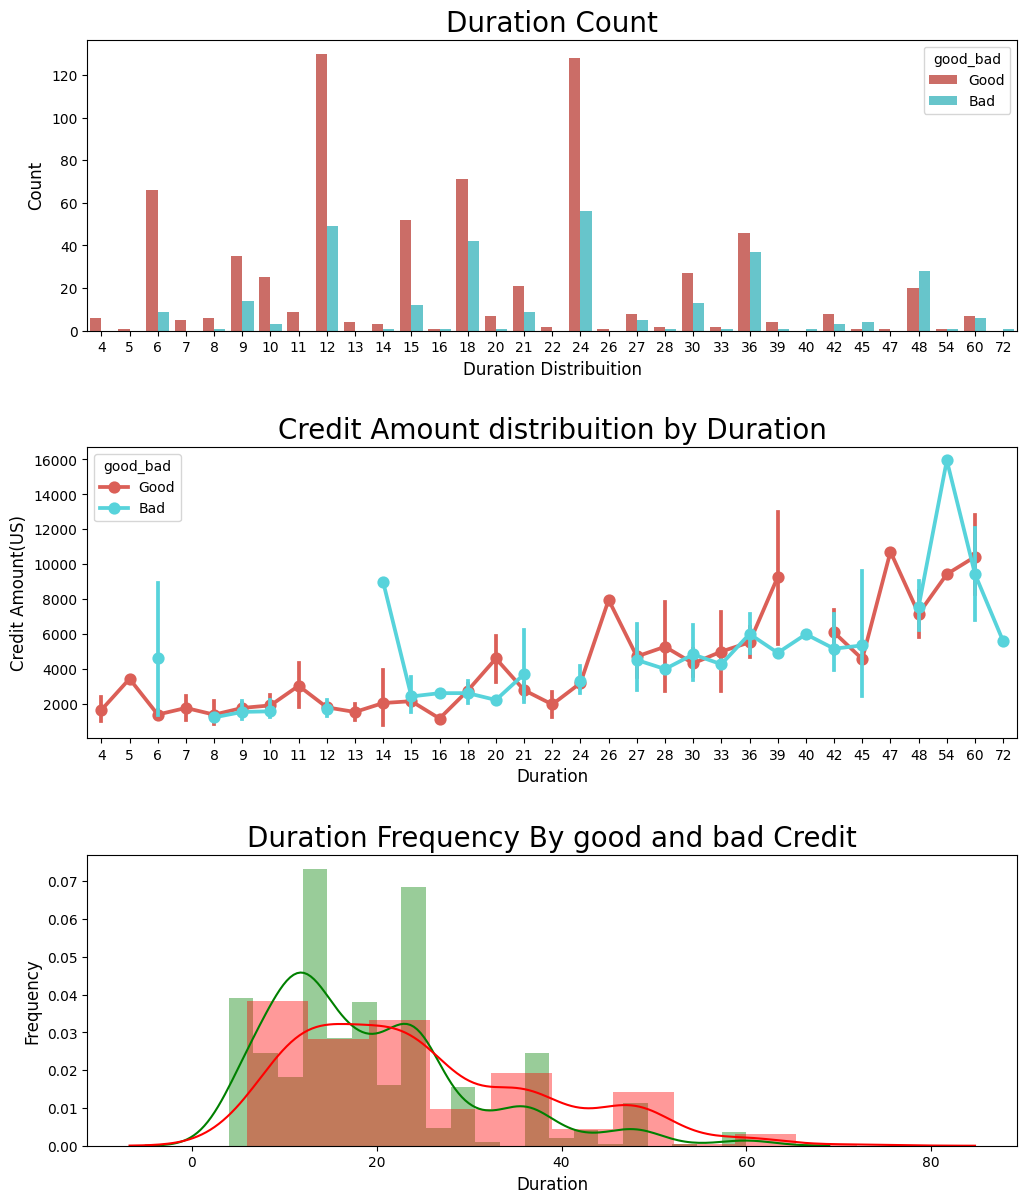

In [29]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "good_bad")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit_amount",data=df_credit,
                   hue="good_bad", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency By good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

<h2> Checking/Status Account variable </h2>

In [30]:
df_credit['Status_account'] = df_credit['Status_account'].replace(['A11'],'In Debt')
df_credit['Status_account'] = df_credit['Status_account'].replace(['A12'],'Moderate')
df_credit['Status_account'] = df_credit['Status_account'].replace(['A13'],'Rich')
df_credit['Status_account'] = df_credit['Status_account'].replace(['A14'],'No checking')

#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Good']["Status_account"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Good']["Status_account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["good_bad"]== 'Bad']["Status_account"].value_counts().index.values,
    y = df_credit[df_credit["good_bad"]== 'Bad']["Status_account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Status accounts Distribuition',
    xaxis=dict(title='Status accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

In [31]:


trace0 = go.Box(
    y=df_credit[df_credit["good_bad"] == 'Good']["Credit_amount"],
    x=df_credit[df_credit["good_bad"] == 'Good']["Status_account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_credit[df_credit["good_bad"] == 'Bad']['Credit_amount'],
    x=df_credit[df_credit["good_bad"] == 'Bad']['Status_account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Status distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

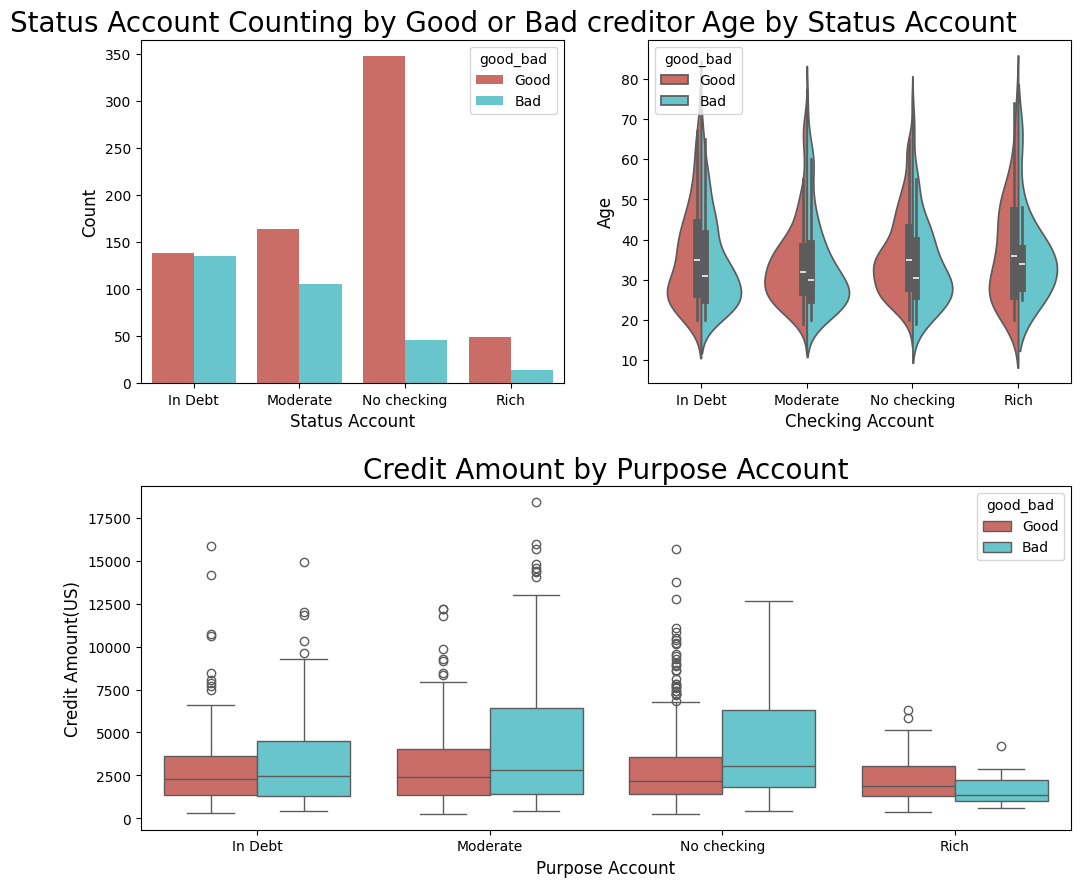

In [32]:
plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Status_account", data=df_credit, 
              palette="hls", hue="good_bad")
g.set_xlabel("Status Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Status Account Counting by Good or Bad creditor", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Status_account", y="Age", data=df_credit, palette="hls", hue = "good_bad",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Status Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Status_account",y="Credit_amount", data=df_credit,hue='good_bad',palette="hls")
g2.set_xlabel("Purpose Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Purpose Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()

In [33]:
df_credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Status_account           1000 non-null   object  
 1   Duration                 1000 non-null   int64   
 2   Credit_history           1000 non-null   object  
 3   Purpose                  1000 non-null   object  
 4   Credit_amount            1000 non-null   int64   
 5   Savings_account/bonds    1000 non-null   object  
 6   Employment_since         1000 non-null   object  
 7   Install_rate             1000 non-null   int64   
 8   Personal_status_sex      1000 non-null   object  
 9   debtors_guarantors       1000 non-null   object  
 10  Present_residence_since  1000 non-null   int64   
 11  Property                 1000 non-null   object  
 12  Age                      1000 non-null   int64   
 13  Other_install_plans      1000 non-null   object  
 14  Housing  

In [34]:
print(pd.crosstab(df_credit.Personal_status_sex, df_credit.Job))

Job                  Highly qualified employee  Skilled employee  Unemployed  \
Personal_status_sex                                                            
Female                                      37               197          12   
Male                                       111               433          10   

Job                  Unskilled  
Personal_status_sex             
Female                      64  
Male                       136  


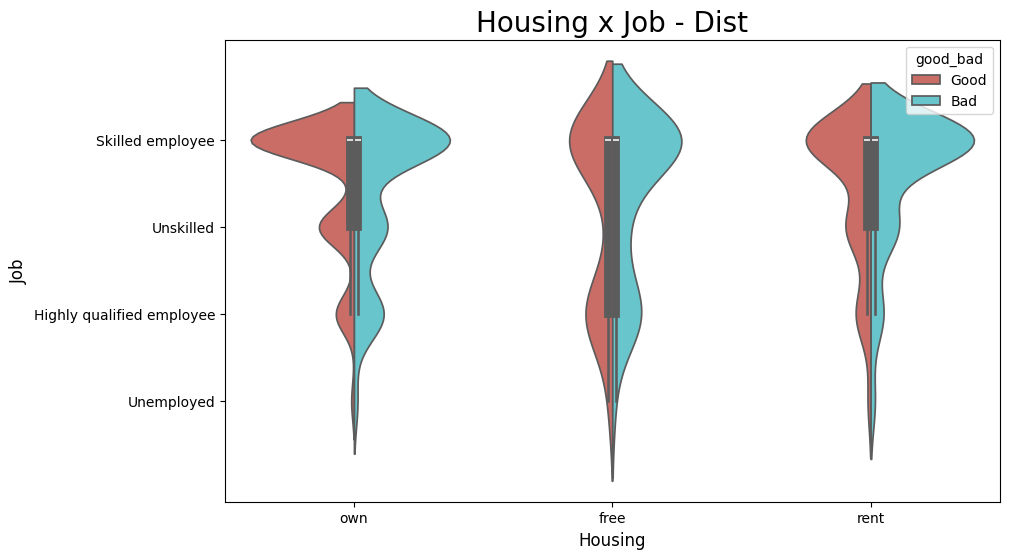

In [35]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="good_bad", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [36]:
print(pd.crosstab(df_credit["Status_account"],df_credit.Personal_status_sex))

Personal_status_sex  Female  Male
Status_account                   
In Debt                  88   186
Moderate                 86   183
No checking             116   278
Rich                     20    43


In [37]:
print(pd.crosstab(df_credit["Purpose"],df_credit.Personal_status_sex))

Personal_status_sex  Female  Male
Purpose                          
Business                 19    78
Domestic appliances       6     6
Education                21    29
Furniture/equipment      74   107
New Car                  70   164
Others                    3     9
Radio/television         85   195
Repairs                   5    17
Retraining                3     6
Used Car                 24    79


### 1.2 Data Preprocessing 

In [40]:
#List of Attributes for dataset acquired from german.doc
#good/bad is the label 1 means good customer while 2 means bad
attributes = ["Status_account", "Duration", "Credit_history","Purpose",
             "Credit_amount","Savings_account/bonds","Employment_since","Install_rate",
              "Personal_status_sex","debtors_guarantors","Present_residence_since",
              "Property","Age","Other_install_plans","Housing","No_credits","Job",
              "No_people_liable","Telephone","foreign_worker","good/bad"] 

#Acquiring dataset from german.data file
df = pd.read_csv("german.data", sep=' ', names = attributes)
df
#Acquiring dataset from german.data file
df = pd.read_csv("german.data", sep=' ', names = attributes)
df
#Qualitative attributes that do not require encoding 
to_remove = ["Duration","Credit_amount","Install_rate","Present_residence_since",
             "Age","No_credits","No_people_liable","good/bad"] 

#Creating the list with the categorical attributes to be encoded
to_be_encoded = attributes.copy()
for el in to_remove:
    to_be_encoded.remove(el)

#K normalizing only the numerical values before one hot encoding for later uses 
scaler2 = MinMaxScaler()
df_normalized_with_categorical = df.copy()
df_normalized_with_categorical[to_remove] = scaler2.fit_transform(df_normalized_with_categorical[to_remove])
#display(df_normalized_with_categorical)

#Using One Hot Encoding to transform categorical attributes into qualitative ones
df_encoded = pd.get_dummies(df, columns=to_be_encoded, dtype = int)
display(df_encoded)

#Normalization between [0,1] and split into 80% training and 20% test 
#Note: Might be worth using k-fold Cross Validation or some other way
scaler = MinMaxScaler()


#K creation of the pandas dataframe of the normalized values
array_df_encoded2 = scaler.fit_transform(df_encoded)

df_normalized = pd.DataFrame(array_df_encoded2, columns=df_encoded.columns)
df_normalized

Duration  Credit_amount  Install_rate  Present_residence_since  Age  \
0           6           1169             4                        4   67   
1          48           5951             2                        2   22   
2          12           2096             2                        3   49   
3          42           7882             2                        4   45   
4          24           4870             3                        4   53   
..        ...            ...           ...                      ...  ...   
995        12           1736             3                        4   31   
996        30           3857             4                        4   40   
997        12            804             4                        4   38   
998        45           1845             4                        4   23   
999        45           4576             3                        4   27   

     No_credits  No_people_liable  good/bad  Status_account_A11  \
0             2                 1         1                   1   
1             1                 1         2                   0   
2             1                 2         1                   0   
3             1                 2         1                   1   
4             2                 2         2                   1   
..          ...               ...       ...                 ...   
995           1                 1         1                   0   
996           1                 1         1                   1   
997           1                 1         1                   0   
998           1                 1         2                   1   
999           1                 1         1                   0   

     Status_account_A12  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  \
0                     0  ...             1             0         0         0   
1                     1  ...             1             0         0         0   
2                     0  ...             1             0         0         1   
3                     0  ...             0             1         0         0   
4                     0  ...             0             1         0         0   
..                  ...  ...           ...           ...       ...       ...   
995                   0  ...             1             0         0         1   
996                   0  ...             1             0         0         0   
997                   0  ...             1             0         0         0   
998                   0  ...             0             1         0         0   
999                   1  ...             1             0         0         0   

     Job_A173  Job_A174  Telephone_A191  Telephone_A192  foreign_worker_A201  \
0           1         0               0               1                    1   
1           1         0               1               0                    1   
2           0         0               1               0                    1   
3           1         0               1               0                    1   
4           1         0               1               0                    1   
..        ...       ...             ...             ...                  ...   
995         0         0               1               0                    1   
996         0         1               0               1                    1   
997         1         0               1               0                    1   
998         1         0               0               1                    1   
999         1         0               1               0                    1   

     foreign_worker_A202  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
995                    0  
996                    0  
997                    0  
998                    0  
999                    0  

[1000 rows x 62 columns]

Duration  Credit_amount  Install_rate  Present_residence_since       Age  \
0    0.029412       0.050567      1.000000                 1.000000  0.857143   
1    0.647059       0.313690      0.333333                 0.333333  0.053571   
2    0.117647       0.101574      0.333333                 0.666667  0.535714   
3    0.558824       0.419941      0.333333                 1.000000  0.464286   
4    0.294118       0.254209      0.666667                 1.000000  0.607143   
..        ...            ...           ...                      ...       ...   
995  0.117647       0.081765      0.666667                 1.000000  0.214286   
996  0.382353       0.198470      1.000000                 1.000000  0.375000   
997  0.117647       0.030483      1.000000                 1.000000  0.339286   
998  0.602941       0.087763      1.000000                 1.000000  0.071429   
999  0.602941       0.238032      0.666667                 1.000000  0.142857   

     No_credits  No_people_liable  good/bad  Status_account_A11  \
0      0.333333               0.0       0.0                 1.0   
1      0.000000               0.0       1.0                 0.0   
2      0.000000               1.0       0.0                 0.0   
3      0.000000               1.0       0.0                 1.0   
4      0.333333               1.0       1.0                 1.0   
..          ...               ...       ...                 ...   
995    0.000000               0.0       0.0                 0.0   
996    0.000000               0.0       0.0                 1.0   
997    0.000000               0.0       0.0                 0.0   
998    0.000000               0.0       1.0                 1.0   
999    0.000000               0.0       0.0                 0.0   

     Status_account_A12  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  \
0                   0.0  ...           1.0           0.0       0.0       0.0   
1                   1.0  ...           1.0           0.0       0.0       0.0   
2                   0.0  ...           1.0           0.0       0.0       1.0   
3                   0.0  ...           0.0           1.0       0.0       0.0   
4                   0.0  ...           0.0           1.0       0.0       0.0   
..                  ...  ...           ...           ...       ...       ...   
995                 0.0  ...           1.0           0.0       0.0       1.0   
996                 0.0  ...           1.0           0.0       0.0       0.0   
997                 0.0  ...           1.0           0.0       0.0       0.0   
998                 0.0  ...           0.0           1.0       0.0       0.0   
999                 1.0  ...           1.0           0.0       0.0       0.0   

     Job_A173  Job_A174  Telephone_A191  Telephone_A192  foreign_worker_A201  \
0         1.0       0.0             0.0             1.0                  1.0   
1         1.0       0.0             1.0             0.0                  1.0   
2         0.0       0.0             1.0             0.0                  1.0   
3         1.0       0.0             1.0             0.0                  1.0   
4         1.0       0.0             1.0             0.0                  1.0   
..        ...       ...             ...             ...                  ...   
995       0.0       0.0             1.0             0.0                  1.0   
996       0.0       1.0             0.0             1.0                  1.0   
997       1.0       0.0             1.0             0.0                  1.0   
998       1.0       0.0             0.0             1.0                  1.0   
999       1.0       0.0             1.0             0.0                  1.0   

     foreign_worker_A202  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
..                   ...  
995                  0.0  
996                  0.0  
997                  0.0  
998                  0.0  
999     

## 2 Unsupervised exploration and clustering 

### 2.1 Dimensionality reduction for data visualization 

<function matplotlib.pyplot.show(close=None, block=None)>

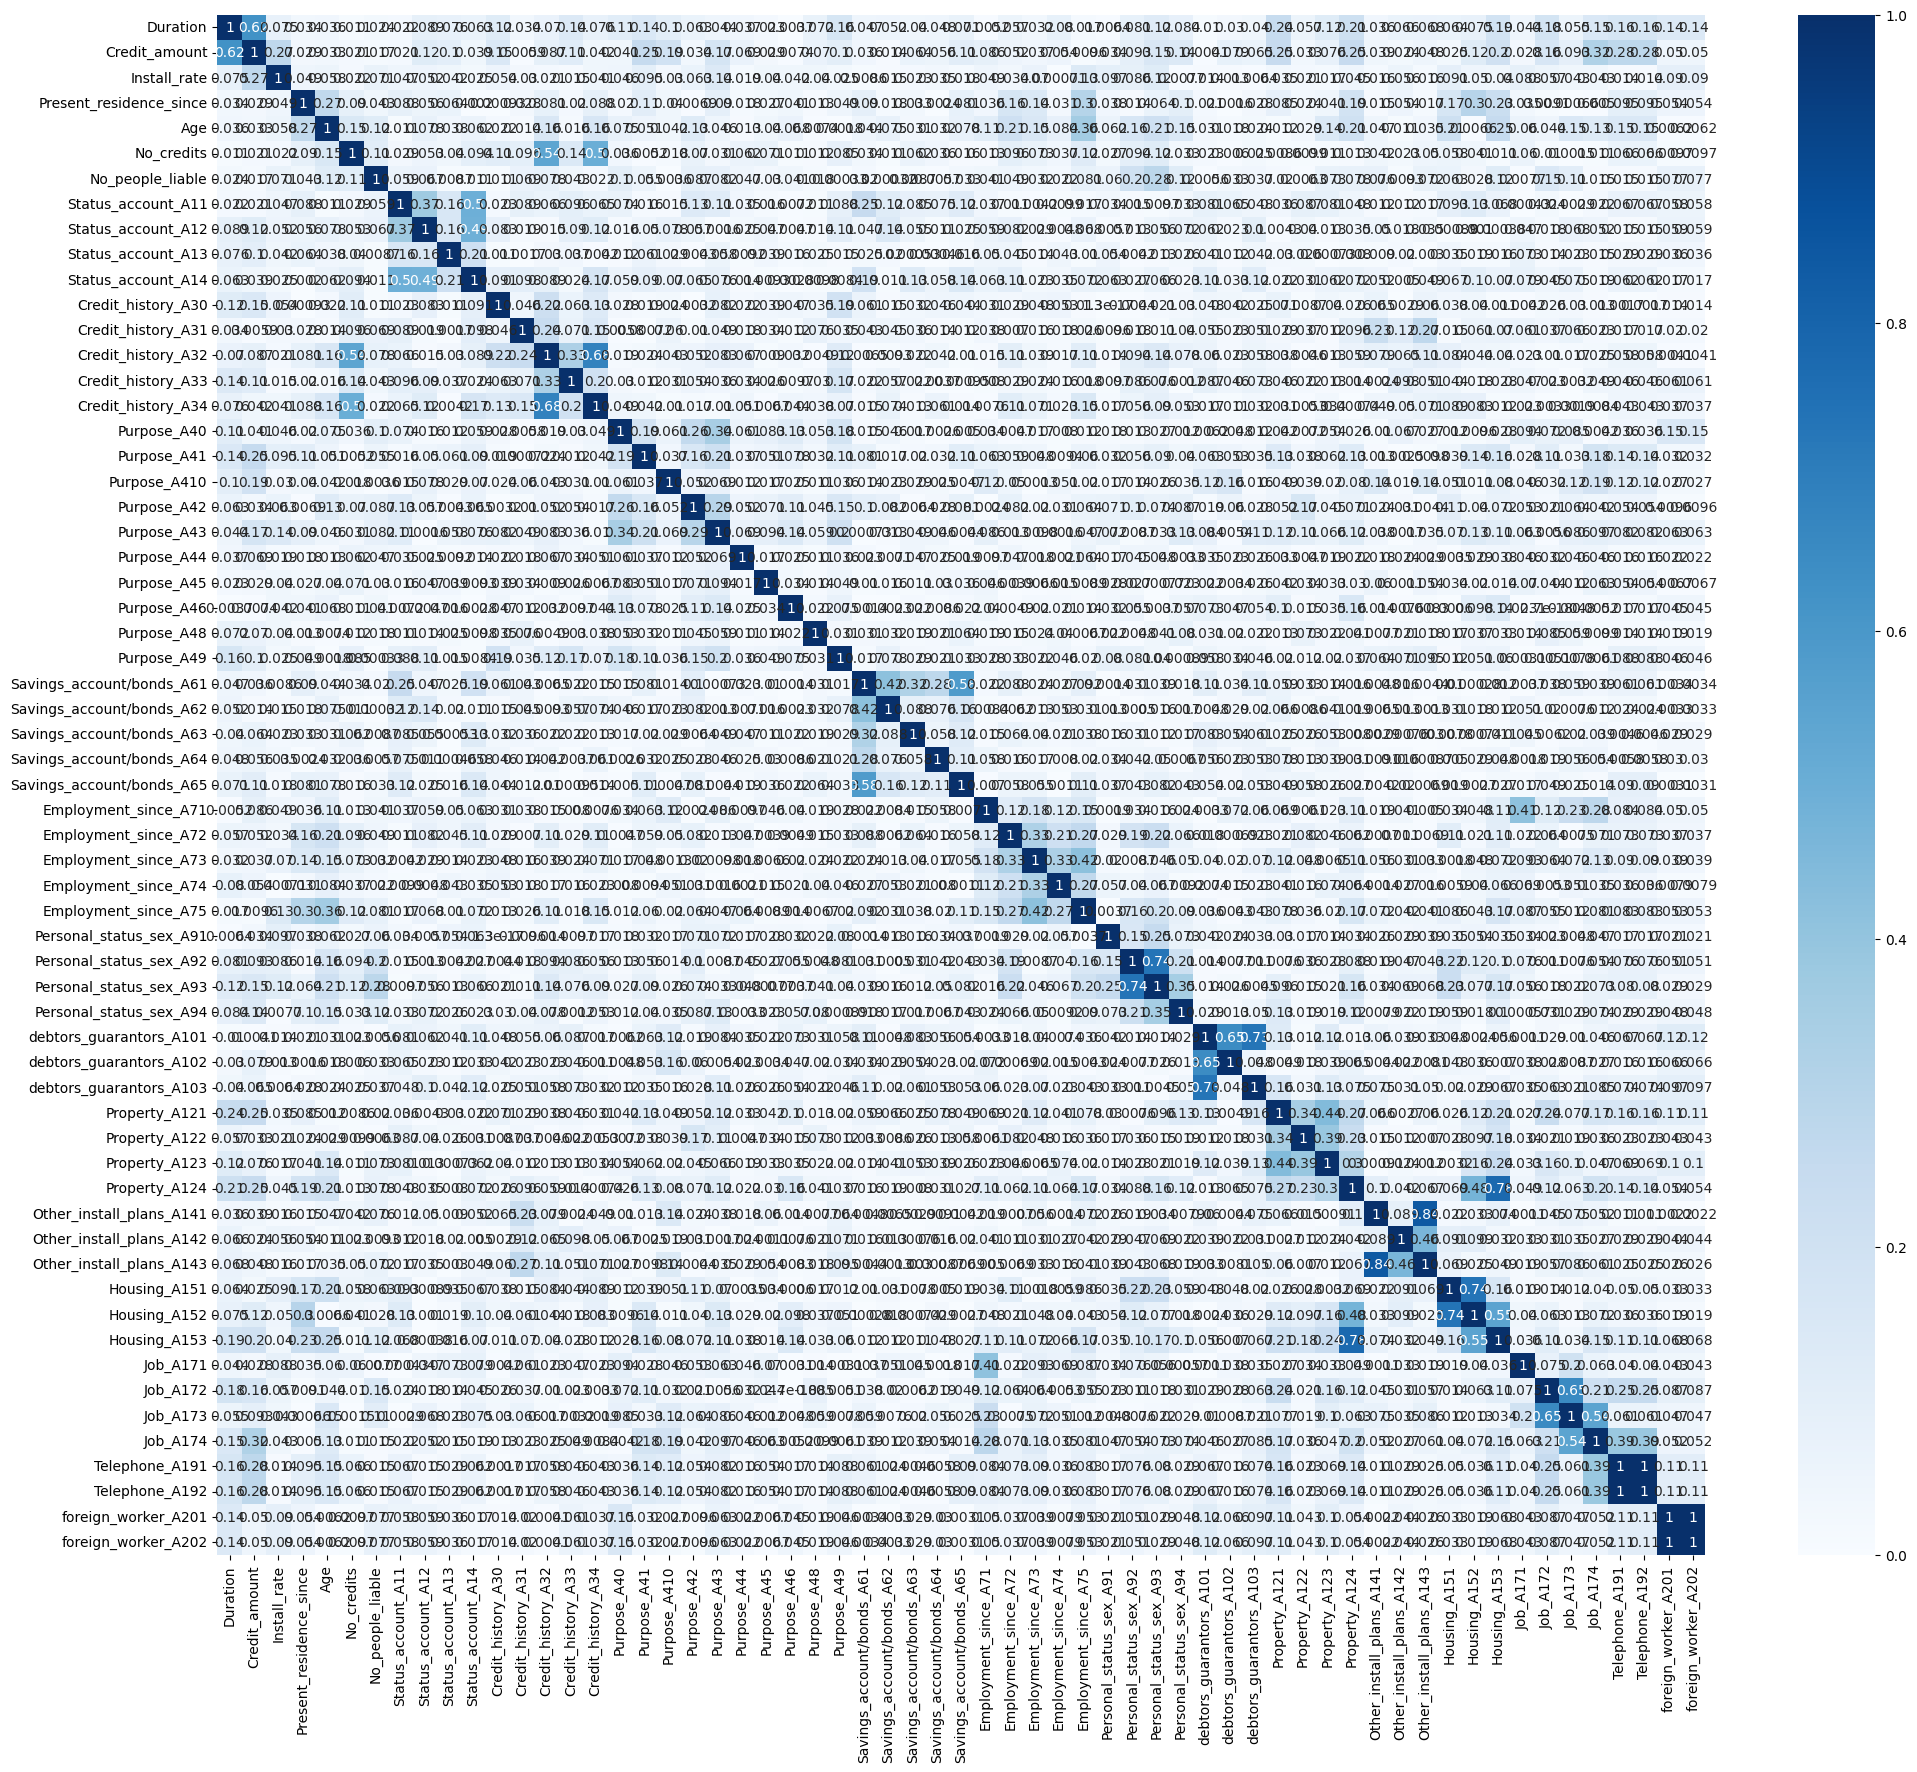

In [43]:
## Creating the list with the categorical attributes to be encoded
to_remove_new = []
attributes_numerical = ["Duration", "Credit_amount", "Install_rate",
              "Present_residence_since","Age","No_credits",
              "No_people_liable","good/bad"] 


for el in df_normalized.columns.tolist():
    if el in attributes_numerical:
        pass
    else:
        to_remove_new.append(el)
#print(to_remove_new)

df_normalized_numerical = df_normalized.drop(to_remove_new, axis = 1)
####### separating "good customer" from "bad customer" data

df_normalized_good = df_normalized_numerical.loc[df_normalized["good/bad"]==0.0]
#display(df_normalized_good)
df_normalized_bad = df_normalized_numerical.loc[df_normalized["good/bad"]==1.0]
#display(df_normalized_good)


####### removing the label column

df_normalized_no_label_good = df_normalized_good.drop("good/bad", axis = 1)
df_normalized_no_label_bad = df_normalized_bad.drop("good/bad", axis = 1)
df_normalized_no_label = df_normalized.drop("good/bad", axis = 1)
# display(df_normalized_no_label_good)
# Apply dimensionality reduction techniques: t-Distributed Stochastic Neighbor Embedding (t-SNE)
# and Principal Component Analysis (PCA) to reduce and visualize the data.

#I compute the correlation between the features to see if there are any correlated features
correlation_analysis = df_normalized_no_label.corr().abs()

plt.figure(figsize = (24,20))
sns.heatmap(correlation_analysis, cmap="Blues", annot=True)
plt.show

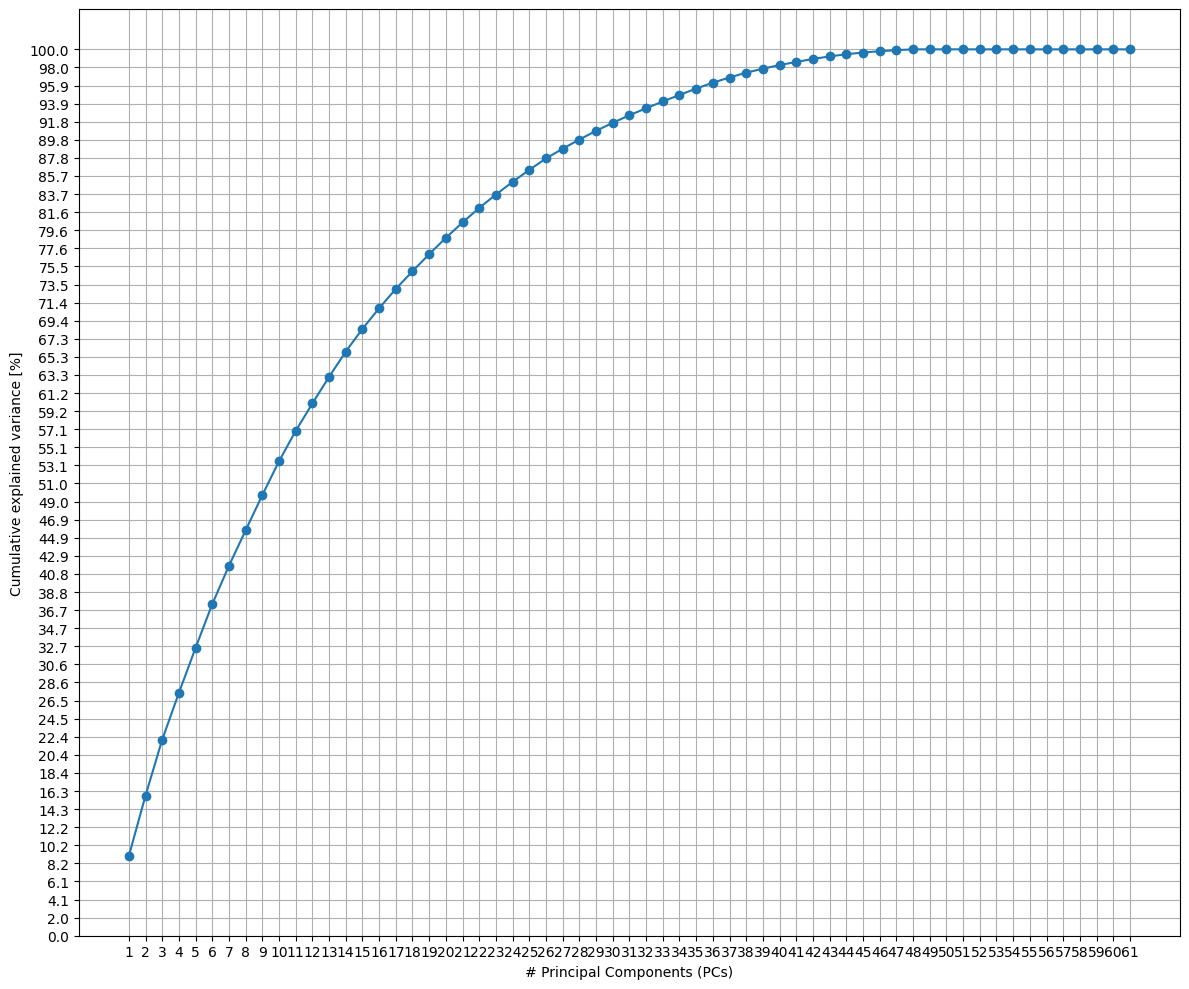

In [44]:
#Aproximately 10 columns will be removed by performing PCA

columns_no_label = df_normalized_no_label.columns
pca = PCA(random_state = 15)
pca.fit(df_normalized_no_label[columns_no_label])


explained_variance = pca.explained_variance_ratio_ #Here i compute the variability of the dataset, while the varaible number keeps increasing, 
                                                    #until reaching all the number
cum_exp_var = np.cumsum(explained_variance)    #This allows to represent the sum for each step (remember 61 features)
perc_cum_exp_var = cum_exp_var * 100          #Representing it in percentage
 

# make the plot of cumulative explained variance wrt number of components
plt.figure(figsize=(12, 10))
plt.plot(perc_cum_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(61)], [i for i in range(1,62)])
plt.yticks(np.linspace(0,100, 50))
plt.grid()
plt.tight_layout()
plt.show()

# for i in range (len(perc_cum_exp_var)):
#     print(i, ":", perc_cum_exp_var[i])

In [45]:
# I Apply t-SNE for dimensionality reduction
perplexities = [5, 10, 20, 30, 50]
learning_rate = np.linspace(10, 1000, 5)

plt.figure(figsize=(15, 10))

for i, perplexity in enumerate(perplexities, 1):
    for lr in learning_rate:
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, learning_rate = lr)
        X_tsne = tsne.fit_transform(df_normalized_no_label[columns_no_label])
        if (perplexity == 5 and lr == 10):
            transformed_df_t_sne = pd.DataFrame(X_tsne, columns = ['C1', 'C2'])

        # scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
        # plt.title(f't-SNE Visualization (Perplexity={perplexity}, Learning Rate={lr})')
        # plt.show()

transformed_df_t_sne

C1         C2
0     9.387000  45.106659
1   -21.120193 -25.617643
2   -48.730602  24.894571
3   -40.195545   8.426905
4    43.167259  44.267723
..         ...        ...
995 -20.166744  -7.803782
996  47.526978   4.838389
997  -8.807094  29.463387
998  35.353855  29.948048
999   9.266341   8.248801

[1000 rows x 2 columns]

<Figure size 1500x1000 with 0 Axes>

In [46]:
#I choose 45 components because i'll be able to describe 99.78% of the entire dataset
pca = PCA(n_components = 45, random_state = 15)
pca.fit(df_normalized_no_label[columns_no_label])

transformed_df = pca.transform(df_normalized_no_label[columns_no_label])

columns_transformed_df = [f'PC{i}' for i in range(0,45)]

transformed_df_pca = pd.DataFrame(transformed_df, columns=columns_transformed_df)
transformed_df_pca

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0    1.093896 -0.671381  0.071017  0.303321  0.084118 -0.110836 -0.417682   
1   -1.416504  0.091914 -0.554413 -0.452032 -0.045156  0.024576 -0.116422   
2   -0.057365 -1.337976  0.891651 -0.151722  0.760248  0.422291 -0.351408   
3   -0.338916  0.466398  1.126655  0.462158 -1.028936 -0.841165 -0.381969   
4    0.126734  0.099974  1.483677  0.675505 -0.634900 -0.680912 -0.411220   
..        ...       ...       ...       ...       ...       ...       ...   
995 -1.110720 -0.061561 -0.003418 -0.086625  0.626471  0.668443 -0.488642   
996  0.324920  1.041201  0.087038 -0.856791  0.197064 -0.279203 -0.891673   
997 -0.014915 -0.808939 -0.476231  0.140822 -0.916645 -0.492958  0.034228   
998  0.572306  0.895386  0.367433  0.039532 -0.977372 -0.702488 -1.093898   
999  0.340852 -0.624195 -0.134619  0.239113 -0.214860 -0.231714  1.296259   

          PC7       PC8       PC9  ...      PC35      PC36      PC37  \
0   -0.405371 -0.494935  1.206839  ... -0.051767 -0.047520 -0.016265   
1   -0.824051  0.472686  0.642354  ... -0.002902  0.209375 -0.016502   
2   -0.055940 -0.264468 -0.330179  ...  0.123963  0.066528  0.166973   
3    0.710006 -0.219607  0.283009  ... -0.155147 -0.789908  0.084449   
4   -0.133550  1.048460 -0.340213  ... -0.046090 -0.072256 -0.078165   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.089493 -0.819155 -0.394127  ... -0.020371  0.041994  0.019686   
996  0.673756 -0.135778 -0.094908  ... -0.260133  0.221969  0.018994   
997 -0.701504 -1.033103 -0.417114  ...  0.084741 -0.024112 -0.082296   
998 -0.798148  0.352825  0.164899  ... -0.000030 -0.012743 -0.094626   
999 -0.038549  0.605814  0.071686  ... -0.193325  0.047610 -0.064254   

         PC38      PC39      PC40      PC41      PC42      PC43      PC44  
0   -0.176023 -0.229730  0.257222 -0.096840 -0.016339  0.009934 -0.018230  
1    0.097444  0.409955  0.022784  0.073513  0.032875 -0.049032 -0.024050  
2   -0.031675  0.116573  0.029484 -0.296427 -0.161382  0.141104 -0.034739  
3   -0.544072  0.558166  0.062337  0.042896 -0.074917  0.138670  0.021247  
4   -0.108399 -0.092325  0.176682 -0.040676  0.046013 -0.011625  0.038202  
..        ...       ...       ...       ...       ...       ...       ...  
995  0.031693  0.017673 -0.079988 -0.048000  0.033705  0.033427 -0.007414  
996  0.021738 -0.048504 -0.062509 -0.014422  0.156565  0.130610 -0.073580  
997  0.018459 -0.073524 -0.070119 -0.026942 -0.003834  0.059109  0.009936  
998  0.020943  0.189848 -0.246600  0.089896  0.025258  0.066402 -0.018669  
999  0.223209  0.369208 -0.155785 -0.268316 -0.295142 -0.144177 -0.034955  

[1000 rows x 45 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

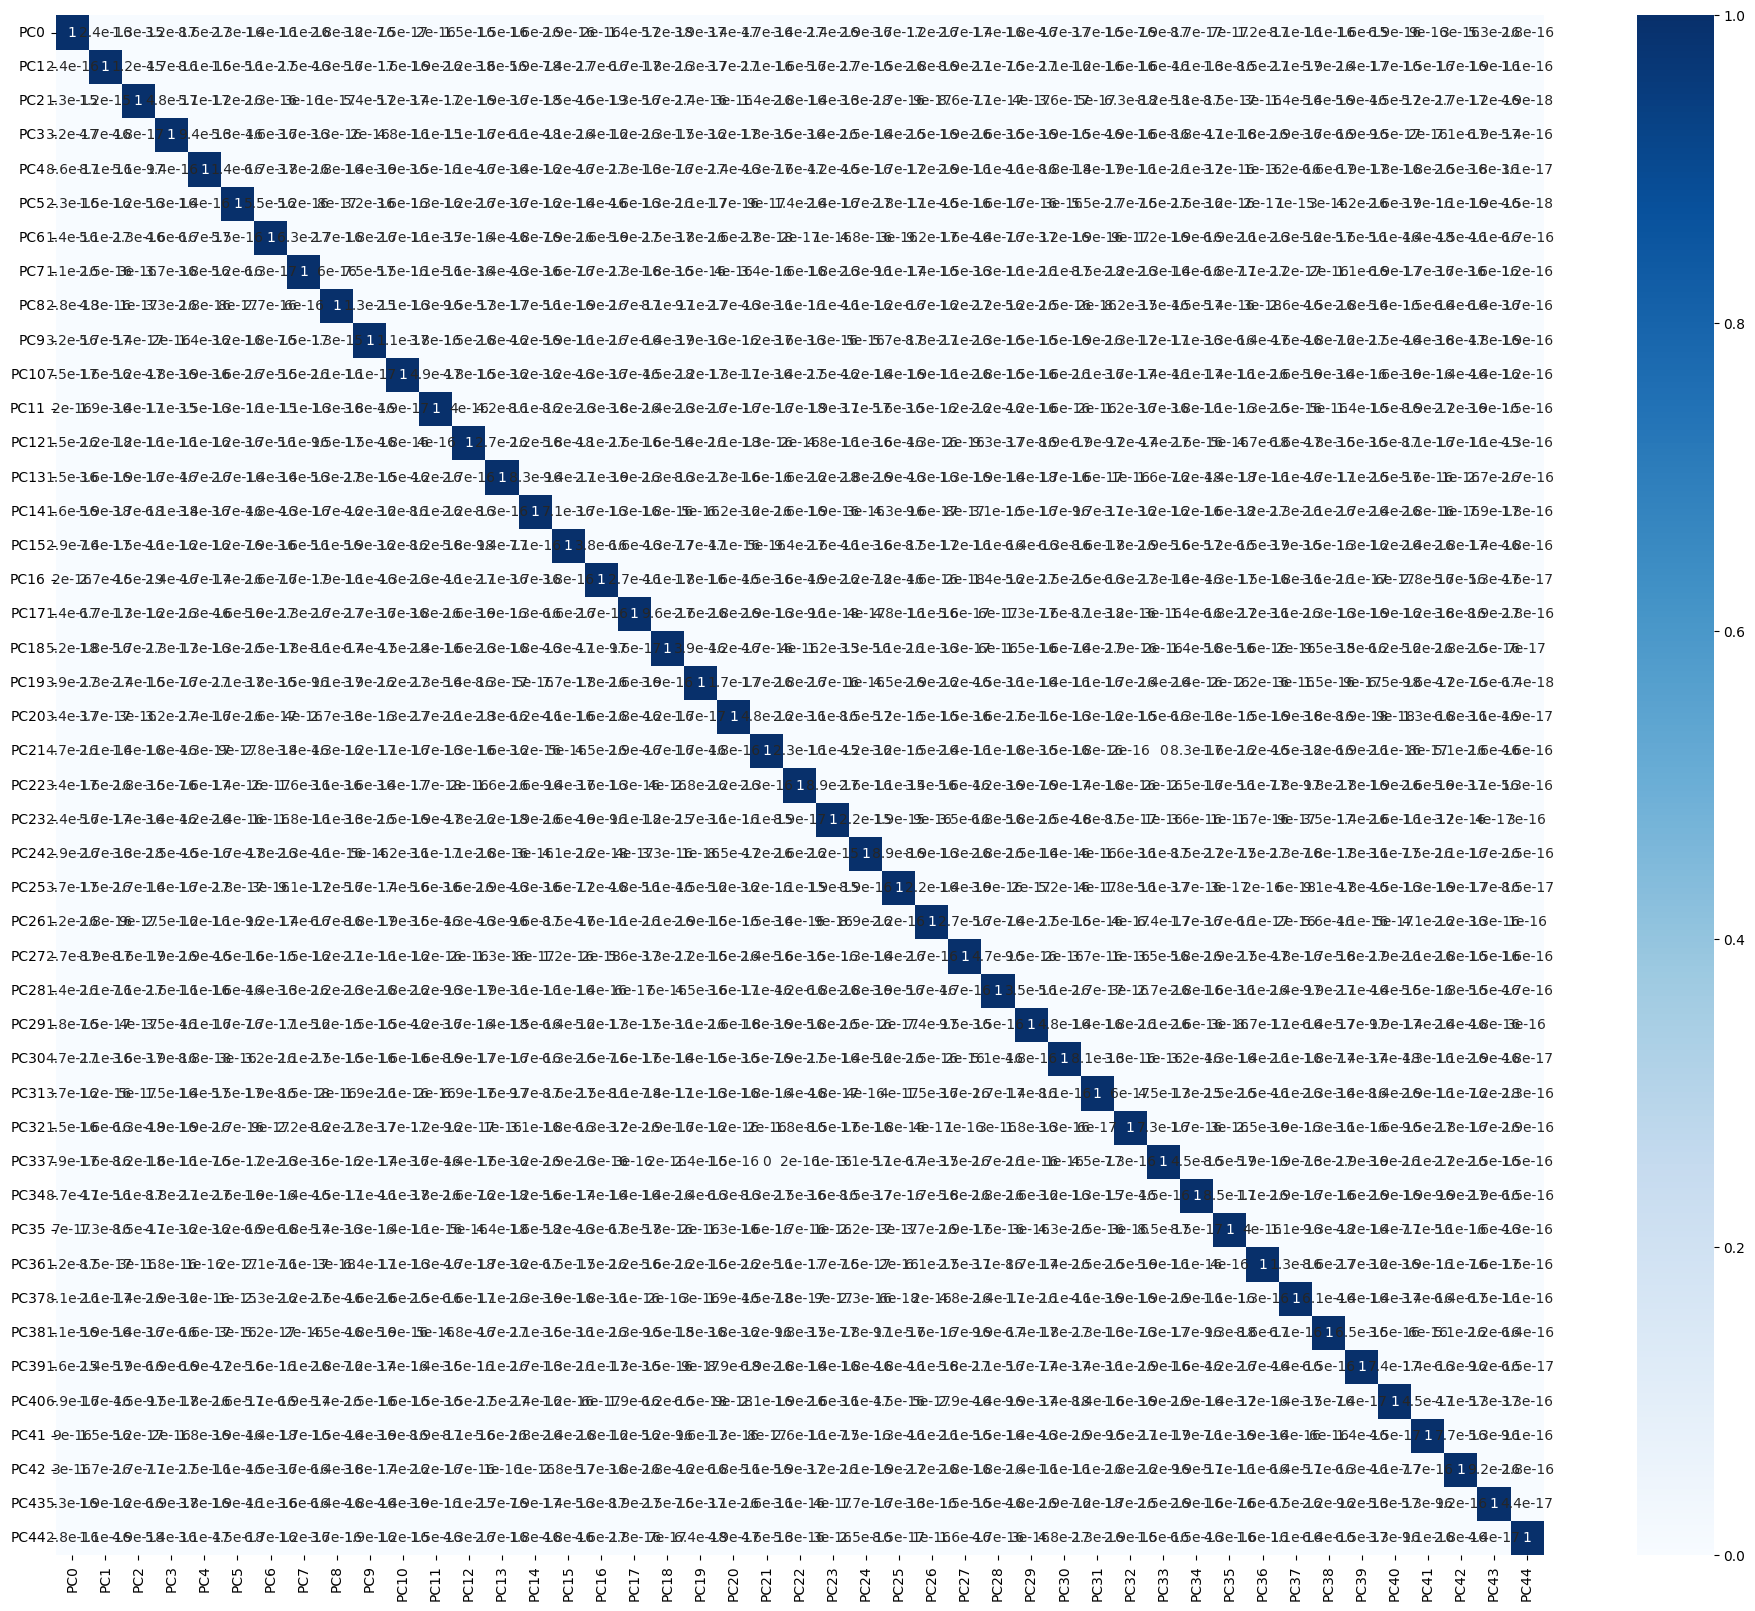

In [47]:
#Compute the correlation matrix after PCA
correlation_analysis = transformed_df_pca.corr().abs()

plt.figure(figsize = (24,20))
sns.heatmap(correlation_analysis, cmap="Blues", annot=True)
plt.show

#transormed_df_pca is the transformed dataset using PCA, it will have 45 features, with a total variance of the dataset of %99,78

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data


In [48]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [49]:
#Splitting the data into sets once again after PCA
X, X_test, y, y_test = train_test_split(
    transformed_df_pca[transformed_df_pca.columns], # X
    df_normalized['good/bad'], # y
    stratify = df_normalized['good/bad'], # stratify the dataset based on class labels
    train_size = 0.8, # percentage of training set
    random_state = 15 
)

# Misclassification costs
cost_fp = 5  # Cost of a False Positive
cost_fn = 1  # Cost of a False Negative

# Set sample weights
sample_weights = [cost_fn if label == 1 else cost_fp for label in y_train]

NameError: name 'y_train' is not defined

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

LR: 0.387574 (0.077970)
LDA: 0.428815 (0.093162)
KNN: 0.263130 (0.035560)
CART: 0.553046 (0.098389)
NB: 0.596300 (0.081365)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will chan

RF: 0.363465 (0.091988)
SVM: 0.182230 (0.088462)
XGB: 0.422917 (0.110550)


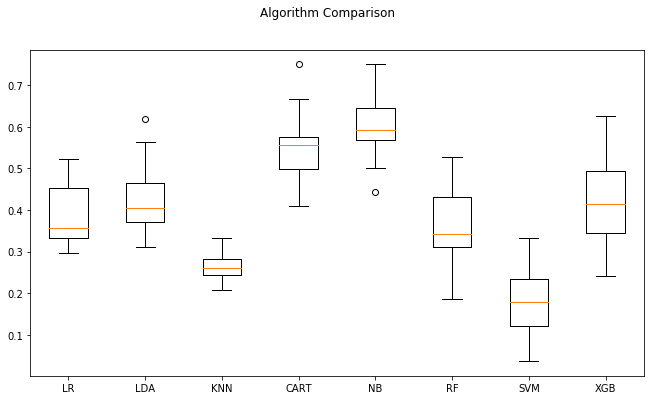

In [ ]:
#DecisionTree

parameters = {"criterion":('gini', 'entropy', 'log_loss'), 'max_depth':[None, 4, 6, 8, 10, 12, 14],
              'min_samples_split':[2, 3, 4, 5, 6, 7, 8]}

#further split into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    stratify = y, 
    train_size = 0.5/0.8, 
    random_state = 40
)
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **7.1 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest to predictict the credit score 
- Some of Validation Parameters

In [ ]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.08695652173913043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.10869565217391304, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.08695652173913043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.15555555555555556, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.08888888888888889, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.043478260869565216, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.08888888888888889, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022222222222222223, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.021739130434782608, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.06521739130434782, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.06521739130434782, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_dep

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   34.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 10, None], 'n_estimators': [3, 5, 10, 25, 50, 150], 'max_features': [4, 7, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=4)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.49111239935587764
{'max_depth': None, 'max_features': 20, 'n_estimators': 5}


In [ ]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [ ]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.736


[[158  20]
 [ 46  26]]


0.3892215568862275


Very sucks results! How can I increase my model? 

# **7.2 Model 2:** <a id="Modelling 2"></a> <br>

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [ ]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [ ]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.7053333333333334


In [ ]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.648


[[124  54]
 [ 34  38]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       178
           1       0.41      0.53      0.46        72

   micro avg       0.65      0.65      0.65       250
   macro avg       0.60      0.61      0.60       250
weighted avg       0.68      0.65      0.66       250



## Let's verify the ROC curve

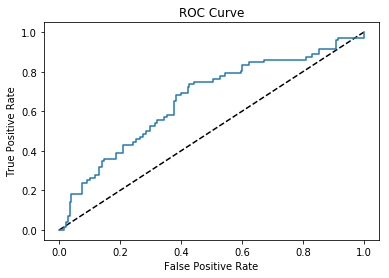

In [ ]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7066666666666668


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.72


[[149  29]
 [ 41  31]]


0.44540229885057464


## Implementing a pipeline of models 

In [ ]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=2,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 6, 10], 'min_child_weight': [3, 5, 10], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [ ]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'subsample': 0.8}

In [ ]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.736


[[161  17]
 [ 49  23]]


## OVERVIEW
---
* Data Cleaning
* Data Preprocessing & Sampling
* Unsupervised & Supervised Machine Learning
* Segmentation of Customers
* Hyperparameter Tuning
* Predictive Modelling with XGBoost to classify the Risk.
* ROC Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from scipy.stats import uniform
from scipy import interp


from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from bayes_opt import BayesianOptimization


import warnings
warnings.filterwarnings("ignore")

#### STANDARDSCALING


scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

#show new values
print(num_df_scaled.shape)
num_df_scaled

## CLUSTERING
---

### K-MEANS

#### APPLYING ELBOW METHOD TO FIND THE BEST NUMBER OF CLUSTERS


In [ ]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

#### ALTERNATIVE METHOD: SILHOUTE SCORE WITH RANDOM SAMPLING


In [ ]:
results = []

for i in range(2,16):
    for r in range(20):
        kmeans = KMeans(n_clusters=i, random_state=r)
        c_labels = kmeans.fit_predict(num_df_scaled)
        sil_ave = silhouette_score(num_df_scaled, c_labels)
        results.append([i, r, sil_ave])
        
res_df = pd.DataFrame(results, columns=['num_cluster', 'seed', 'sil_score'])
pivot_kmeans = pd.pivot_table(res_df, index='num_cluster', columns='seed', values='sil_score')

plt.figure(figsize=(15,6))
plt.tight_layout
sns.heatmap(pivot_kmeans, annot=True, linewidths=0.5, fmt='.3f', cmap='magma', annot_kws={"size":8});

* The scores of 2,3,4 and 5 are pretty stable, Let's pick a number of cluster from that range.


#### AT 3 NUMBER OF CLUSTERS

In [ ]:
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(num_df_scaled)

In [ ]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(num_df_scaled[clusters ==i,0], num_df_scaled[clusters ==i,1], num_df_scaled[clusters ==i,2])
    


In [ ]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(df['Duration'], df['Credit_amount'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(df['Age'], df['Credit_amount'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(df['Age'], df['Duration'], hue=clusters, ax=ax[2], palette='cividis');

#### LET'S CREATE A DATAFRAME TO SUMMARIZE THE RESULT

In [ ]:
df_clustered = df[['Age', 'Duration', 'Credit_amount']]
df_clustered['cluster'] = clusters

In [ ]:
df_clustered.groupby('cluster').mean()

## PREDICTIVE MODELLING
---

In [ ]:
num_df_scaled = pd.DataFrame(num_df_scaled, columns=['Age', 'Duration', 'Credit Amount'])
cat_df = df[categorical_features]

data = pd.concat([cat_df, num_df_scaled], axis=1)

In [ ]:
#show new dataframe
data.head()

### XGBOOST MODEL

#### SPLIT THE DATA

In [ ]:
x = data.drop('good_bad', axis=1)
y = data['good_bad']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

print('xtrain shape: ', x_train.shape)
print('xtest shape: ', x_test.shape)
print('ytrain shape: ', y_train.shape)
print('ytest shape: ', y_test.shape)

#### HYPERPARAMETER TUNING


In [ ]:
#RandomSearchCV
# define the parameters to tune
param_dist = {"learning_rate": uniform(0, 2),
              "gamma": uniform(1, 0.000001),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10),
              'n_jobs': range(1,5)}
#instance of RandomSearchCV
rs = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=25) #25 iterations

In [ ]:
rs.fit(x_train, y_train)

#### PREDICT THE TEST DATA


In [ ]:
predictions = rs.predict(x_test)

print(classification_report(y_test, predictions))

### PLOTTING ROC CURVE

In [ ]:
def plot_roc(X, y, estemator,n_splits, lns = 100):
    #creating an instance of KFold
    kfold = StratifiedKFold(n_splits=n_splits,shuffle=False)
    #define estemator
    rf = estemator
    #deifne figuresize
    plt.rcParams['figure.figsize'] = (10,5)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,lns)
    i = 1

    for train,test in kfold.split(X,y):
        #get prediction
        prediction = rf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
        #get the true pos. rate, false positive rate and thresh 
        fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        #get the area under the curve
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plot the tpr and fpr
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    #plot the mean ROC
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='gold',
    label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    #setup the labels
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title('ROC PLOT', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

In [ ]:
xgb_model = XGBClassifier()
xgb_model.set_params(**rs.best_params_)

plot_roc(x,y, xgb_model, n_splits=10)